In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
# importing the data 
df=pd.read_csv('C:\\Users\\Gaura\\OneDrive\\Desktop\\dataset\\spam or ham.csv',encoding='latin-1')
df.dropna(how="any", inplace=True, axis=1) #here we are dropping the columns which where empty
df.columns = ['label', 'message'] # and here we are giving the name to the columns lables and messgaes
# which where v1 and v2 earlier
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [3]:
df.describe()
# there where 5572 records in the table
# are there are two unique lables in the lable colums they are spam and ham .
# and count of ham is more than the spam.
# and outof 5572  4825 times the ham is occured .i.e the ham messages are more than the spam messages

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


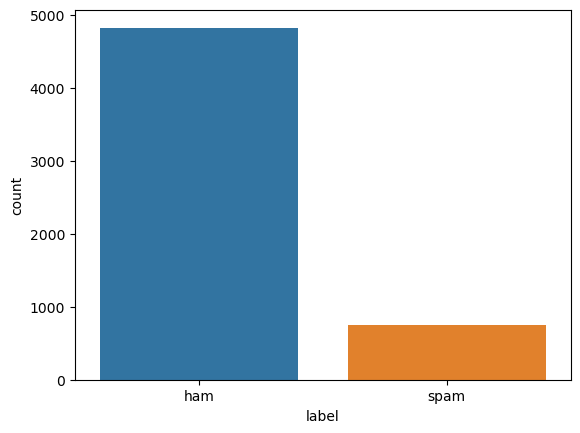

In [4]:
sns.countplot(x='label',data=df)
plt.show()

In [5]:
#converting the spam and ham into the numbers 0=ham and 1=spam messages
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
df['message_len'] = df.message.apply(len)
df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


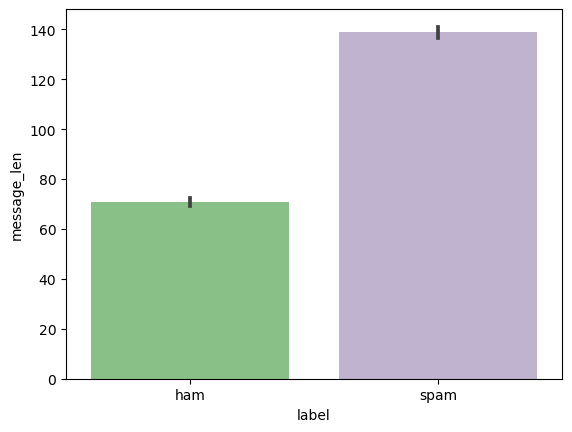

In [11]:
sns.barplot(x='label',y='message_len',data=df,palette = "Accent")
plt.show()
# as we can clearly see that the len of the spam messages are more than the ham messages
# and the length of the HAM messages are close to the 70 but the length of the spam messages are 130 
# and above

# Text Cleaning and pre-processing

In [10]:
# removing the stop words 
# removing the Puntuations
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [11]:
corpus=[]
for i in range(len(df)):
    #sub-->removing the words 
    # and in our case we are removing the everything except the letters a-z and A-Z and if we want to keep the numbers we have
    # write [^a-bA-Z0-9]
    rp=re.sub('[^a-zA-Z]'," ",df['message'][i])
    # we are converting everyting into the lower case bcoz the stop words that we have in our library are small
    rp=rp.lower()
    rp=rp.split()
    #here it is checking if the words that we have in (rp) is in the present in our library of stop words if not then are 
    #gong to store it into the rp again
    rp=[ps.stem(word) for word in rp if not word  in set(stopwords.words('english'))]
    rp=" ".join(rp)
    corpus.append(rp)
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [32]:
df['clean_mess']=corpus
df.head()

,label,message,label_num,message_len,clean_mess
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think goe usf live around though


# vectorisation

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
y=pd.get_dummies(df['label_num'],drop_first=True)
y

,1
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [14]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split

print('X data before spliting:',x.shape)
print('Y data before spliting: ',y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=1)

print('x_train shape:',X_train.shape)
print('x_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X data before spliting: (5572, 6221)
Y data before spliting:  (5572, 1)
x_train shape: (3900, 6221)
x_test shape: (1672, 6221)
y_train shape: (3900, 1)
y_test shape: (1672, 1)


# Applying the Model

In [15]:
#1 first Model MUltinomial Nave-Base theorem
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

# prediction

In [16]:
t_pred_train=model.predict(X_train)
t_pred_test=model.predict(X_test)

# Evaluation

In [17]:
from sklearn.metrics import accuracy_score
print('training accuracy:',accuracy_score(y_train,t_pred_train))
print('testing accuracy:',accuracy_score(y_test,t_pred_test))

training accuracy: 0.9935897435897436
testing accuracy: 0.9772727272727273


C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


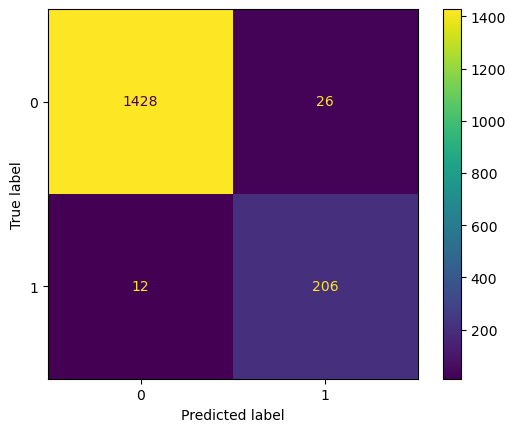

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)

In [19]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('The mean Cross-Validation score is:',cv_score)

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.97578475 0.98116592 0.97486535 0.97935368 0.97576302]
The mean Cross-Validation score is: 0.977386543864875


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,t_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1454
           1       0.89      0.94      0.92       218

    accuracy                           0.98      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672



# Trying the Logistic regression:

In [21]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(X_train,y_train)

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [22]:
#prediction
pred_train=Lr.predict(X_train)
pred_test=Lr.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print('training accuracy:',accuracy_score(y_train,pred_train))
print('testing accuracy:',accuracy_score(y_test,pred_test))

training accuracy: 0.9953846153846154
testing accuracy: 0.9784688995215312


C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


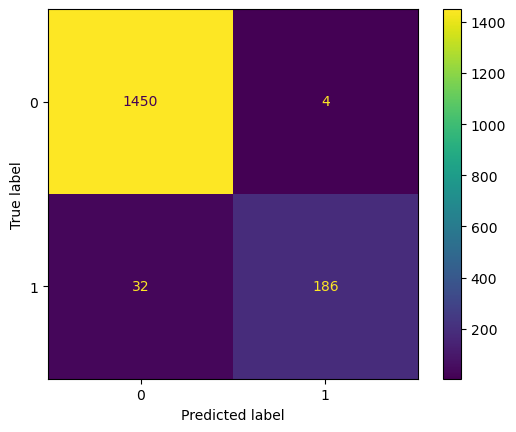

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Lr,X_test,y_test)

In [25]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('The mean Cross-Validation score is:',cv_score)

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.97578475 0.98116592 0.97486535 0.97935368 0.97576302]
The mean Cross-Validation score is: 0.977386543864875


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,t_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1454
           1       0.89      0.94      0.92       218

    accuracy                           0.98      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [27]:
def pred(msg):
    msg = cv.transform([msg])
    prediction = model.predict(msg)
    return prediction[0]
#here 1= spam and 0=ham 

In [30]:
#pred('Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now for delivery tomorrow')
#pred('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat')			
pred('ICICI Securities Relationship Manager | Package Rs 3.4 LPA onwards | APPLY NOW')

0